C:\Users\VINAYAK\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2099 - mae: 0.3165 - val_loss: 0.0040 - val_mae: 0.0518
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0028 - mae: 0.0427 - val_loss: 0.0022 - val_mae: 0.0375
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0023 - mae: 0.0382 - val_loss: 0.0022 - val_mae: 0.0373
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0020 - mae: 0.0356 - val_loss: 0.0022 - val_mae: 0.0374
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mae: 0.0389 - val_loss: 0.0025 - val_mae: 0.0401
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mae: 0.0410 - val_loss: 0.0021 - val_mae: 0.0375
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0021 - mae: 0.0364 - val_loss: 0.0029 - val_mae: 0.0429
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0023 - mae: 0.0379 - val_loss: 0.0022 - val_mae: 0.0384
Epoch 9/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0022 - ma

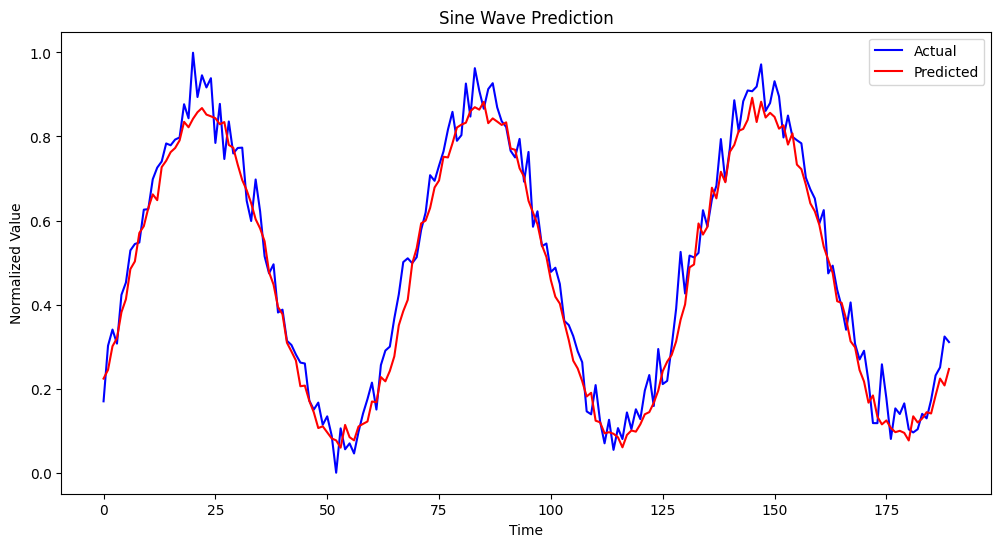

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Generate a simple synthetic dataset
def generate_dataset():
    x = np.linspace(0, 100, 1000)
    y = np.sin(x) + np.random.normal(0, 0.1, size=x.shape)  # Sine wave with noise
    return x, y

# Generate data
x, y = generate_dataset()

# Normalize the data
y = (y - np.min(y)) / (np.max(y) - np.min(y))

# Prepare the data
sequence_length = 50
x_data = []
y_data = []
for i in range(len(y) - sequence_length):
    x_data.append(y[i:i+sequence_length])
    y_data.append(y[i+sequence_length])

x_data = np.array(x_data)
y_data = np.array(y_data)

# Flatten input data for FCNN
x_data = x_data.reshape((x_data.shape[0], -1))

# Split into training and testing sets
train_size = int(len(x_data) * 0.8)
x_train, x_test = x_data[:train_size], x_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

# Build the FCNN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='mse', 
              metrics=['mae'])

# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=16, validation_data=(x_test, y_test))

# Evaluate the model
loss, mae = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Mean Absolute Error (MAE): {mae}")

# Make predictions
predictions = model.predict(x_test)
print("Predictions:", predictions[:5].flatten())
print("Actual:", y_test[:5])

# Example usage
example_input = x_test[0].reshape((1, -1))
example_prediction = model.predict(example_input)
print("Example Input (first sequence from test set):", x_test[0])
print("Predicted Next Value:", example_prediction.flatten()[0])

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label="Actual", color="blue")
plt.plot(range(len(predictions)), predictions.flatten(), label="Predicted", color="red")
plt.title("Sine Wave Prediction")
plt.xlabel("Time")
plt.ylabel("Normalized Value")
plt.legend()
plt.show()
